# Analysis of the Red Wine Quality dataset

The file provides the analysis of the Red Wine Quality dataset from the Kaggle data repository (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). The dataset is provided by Cortez et al. (2009) and includes a sample of 1599 kinds of red "Vinho Verde" wine from the Minho (north-
west) region of Portugal. The dataset provides quality assessments of wine tastes as well as measurements from physicochemical tests on 11 attributes of wine:
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). Regarding the assessments of preferences (column "quality"), each sample was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The  final sensory score is given by the median of these evaluations Cortez et al., 2009, p.6-7). 

The aim of the analysis is to develop and test models to identify which attributes contribute to good or bad quality of red wine and models to predict the degree of alcohol concentration in red wine. Such models could be useful to support the oenologist wine tasting evaluations and improve wine production, also they could help in target marketing by modeling consumer tastes.

Additional objectives of the analysis are:
- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice creating dashboards with Google Data Studio.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

The analysis consists of several parts: 1) exploratory analysis of the Red Wine Quality dataset, 2) inferences about the statistical significance of differences among groups of wine, 3) training, testing and evaluating of machine learning models which could explain factors affecting wine quality (classification) and alcohol concentration (regression).

## Importing Python libraries and understanding the data

The first step of the analysis is to import data from the Kaggle website and to import Python libraries which will be used for the analysis. The main libraries which will be used for the manipulation with data are pandas and numpy. Matplotlib, seaborn and yellowbrick will be used for data visualization. Scipy, Statsmodels, Researchpy, Math, Random will be used for conducting statistical tests, calculating confidence intervals. Sklearn will be used for spliting data into training and testing samples, building and testing machine learning models. 

Some functions used for statistical inferences, etc. will be imported from a local file 'utils.py'.

In [1]:
import pandas as pd
from numpy import mean, absolute

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import CVScores
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import roc_auc
from yellowbrick.classifier import confusion_matrix
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.regressor import ResidualsPlot

import math
import random
from heapq import nlargest
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency, norm 

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings
warnings.filterwarnings('ignore')

from utils import *

### Importing data and examining variables

The red wine quality dataset is imported and saved into pandas dataframe.

In [2]:
redwine = pd.read_csv('/Users/user/PycharmProjects/Red_wine/winequality/winequality-red.csv', sep=';',encoding="UTF-8")

By examining the dataframe, it was found that it contains 12 columns (11 measurements of wine attributes and a column wilth wine quality assessments in the scale from 1 to 10) and 1599 rows (different kinds of red wine).

In [3]:
redwine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
redwine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Distributions of values of variables were plotted as histograms (see bellow). It can be seen that some of variables fit normality criteria (density, ph, sulfates, volatile acidity), others are skewed (fixed acidity, free sulfur dioxide, total sulfur dioxide, alcohol). Chlorides and residual sugar mainly have normal distribution, however, they also have upper outliers. Citric acid variable does not have normal distribution. Quality variable has values from 3 to 8 and is normally distributed. Variables in the dataset have different scales so, in order, to use them for statistical models they have to be normalized. 

Text(0.5, 1.0, 'Distribution by residual sugar')

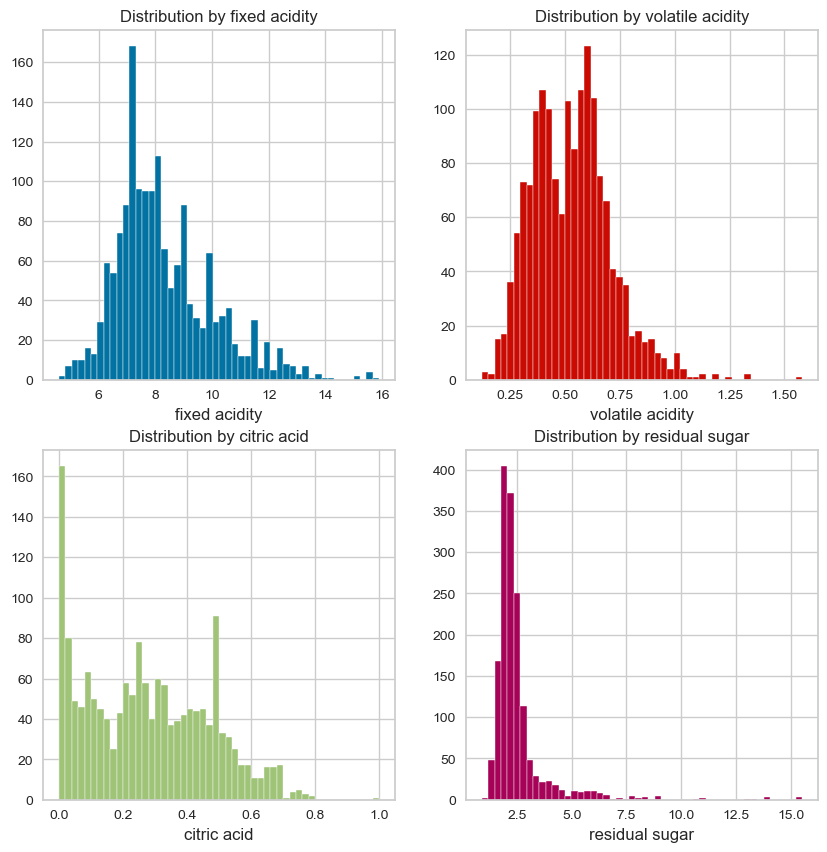

In [6]:
plt.figure(figsize=[10,10])
 
plt.subplot(221)
plt.hist(redwine['fixed acidity'],bins=50,color='b')
plt.xlabel('fixed acidity')
plt.title('Distribution by fixed acidity')
 
plt.subplot(222)
plt.hist(redwine['volatile acidity'],bins=50,color='r')
plt.xlabel('volatile acidity')
plt.title('Distribution by volatile acidity')
 
plt.subplot(223)
plt.hist(redwine['citric acid'],bins=50,color='g')
plt.xlabel('citric acid')
plt.title('Distribution by citric acid')
 
plt.subplot(224)
plt.hist(redwine['residual sugar'],bins=50,color='m')
plt.xlabel('residual sugar')
plt.title('Distribution by residual sugar')



Text(0.5, 1.0, 'Distribution by density')

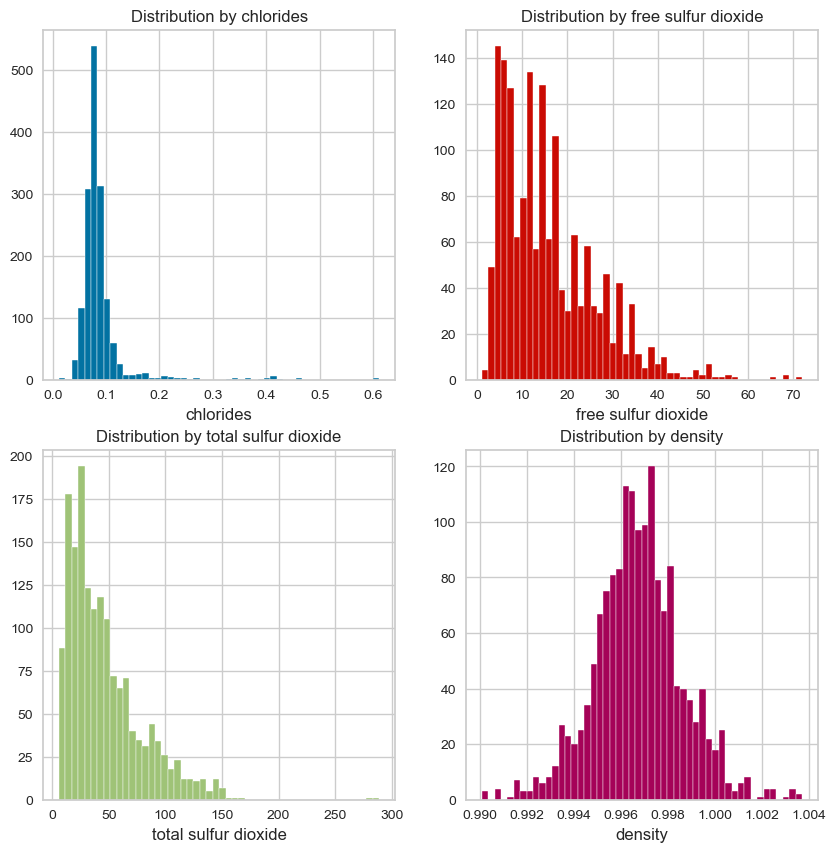

In [7]:
plt.figure(figsize=[10,10])

plt.subplot(221)
plt.hist(redwine['chlorides'],bins=50,color='b')
plt.xlabel('chlorides')
plt.title('Distribution by chlorides')
 
plt.subplot(222)
plt.hist(redwine['free sulfur dioxide'],bins=50,color='r')
plt.xlabel('free sulfur dioxide')
plt.title('Distribution by free sulfur dioxide')
 
plt.subplot(223)
plt.hist(redwine['total sulfur dioxide'],bins=50,color='g')
plt.xlabel('total sulfur dioxide')
plt.title('Distribution by total sulfur dioxide')
 
plt.subplot(224)
plt.hist(redwine['density'],bins=50,color='m')
plt.xlabel('density')
plt.title('Distribution by density')




Text(0.5, 1.0, 'Distribution by quality')

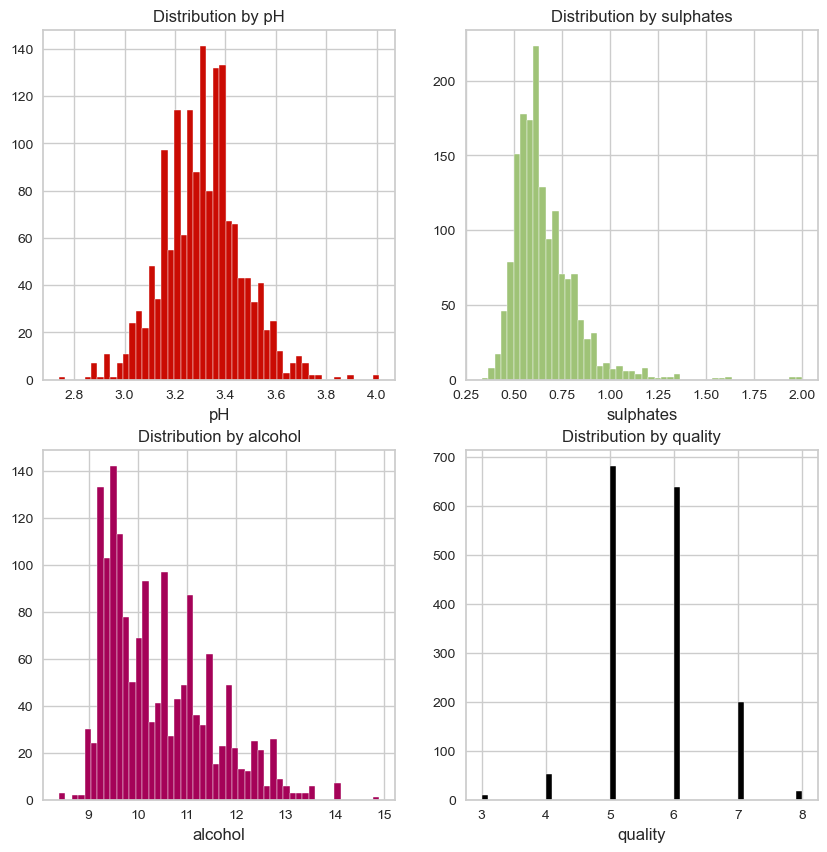

In [8]:
plt.figure(figsize=[10,10])

plt.subplot(221)
plt.hist(redwine['pH'],bins=50,color='r')
plt.xlabel('pH')
plt.title('Distribution by pH')
 
plt.subplot(222)
plt.hist(redwine['sulphates'],bins=50,color='g')
plt.xlabel('sulphates')
plt.title('Distribution by sulphates')
 
plt.subplot(223)
plt.hist(redwine['alcohol'],bins=50,color='m')
plt.xlabel('alcohol')
plt.title('Distribution by alcohol')

plt.subplot(224)
plt.hist(redwine['quality'],bins=50,color='black')
plt.xlabel('quality')
plt.title('Distribution by quality')

### Checking for missing values

Dataframes were checked for missing values (fuction for checking missing values was imported from a local file 'utils.py'.) It can be observed that there are no missing values in podcasts, categories, reviews and runs dataframes.

In [9]:
check_missing_values(redwine)

The total number of missing values is: 0


### Checking for outliers

A function for finding outliers is applied for user specified input values (a column number of a variable from 0 to 10 and a coefficient for the Tuckey's rule in the scale from 1 to 3). It can be observed that, if the coeficient is 1.5, the majority of variables have more upper than lower outliers. Four variables have lower outliers. The highest numbers of outliers are in variables "fixed acidity' (No.0, 155 upper outliers, 9 lower outliers) and residual sugar (No.4, 103 upper outliers).

In [10]:
while True:

    inp1 = int(input("What is number of the column in the dataframe?:"))
    inp2 = float(input("What is a coefficient for the Tuckey's rule? (e.g 1.5, 2 or else):"))
    if (inp1 in [0,1,2,3,4,5,6,7,8,9,10]) and (inp2 in [1,1.5,2,2.5,3]):
        find_outliers(redwine, inp1, inp2)
    else:
        break


What is number of the column in the dataframe?:3
What is a coefficient for the Tuckey's rule? (e.g 1.5, 2 or else):1.5
The number of lower outliers is:0,    The number of upper outliers is :155
What is number of the column in the dataframe?:133
What is a coefficient for the Tuckey's rule? (e.g 1.5, 2 or else):2.344


### Examining relationships between variables

Next, relationships between variables are examined. The command bellow gives an opportunity to enter different numbers of columns into the brackets, separated by commas, (No. 11 is compulsory as it is "quality" which provides colors for the plots; other numbers are optional).

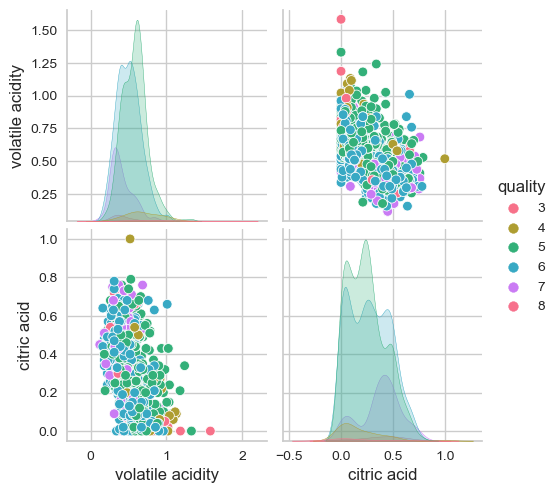

In [62]:
g = sns.pairplot(redwine.iloc[:,[1,2,11]], hue='quality', palette='husl')


Similar plots, which use JointPlot Visualizer function from yellowbricks library and also provide distributions of variables, could be generated by the command bellow.

Enter a name of a first independent variable:residual sugar
Enter a name of a second independent variable:alcohol


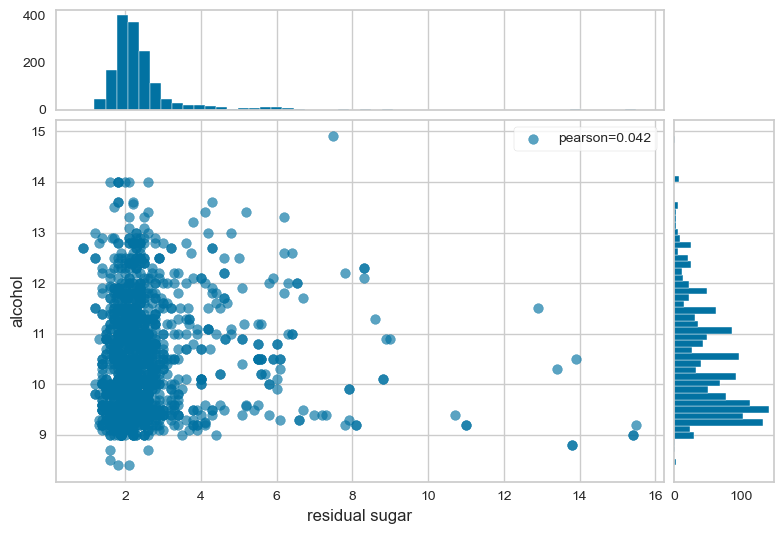

In [ ]:
while True:
    inp1 = str(input("Enter a name of a first independent variable:"))
    inp2 = str(input("Enter a name of a second independent variable:"))
    if (inp1 in redwine.columns.values) and (inp2 in redwine.columns.values):
        visualizer = JointPlotVisualizer(columns = [inp1, inp2])
        visualizer.fit_transform(redwine.iloc[:,:11], redwine["quality"])
        visualizer.show()
    else:
        break

A heatmap plot from seaborn library gives an opportunity to examine correlations between variables.

<Axes: >

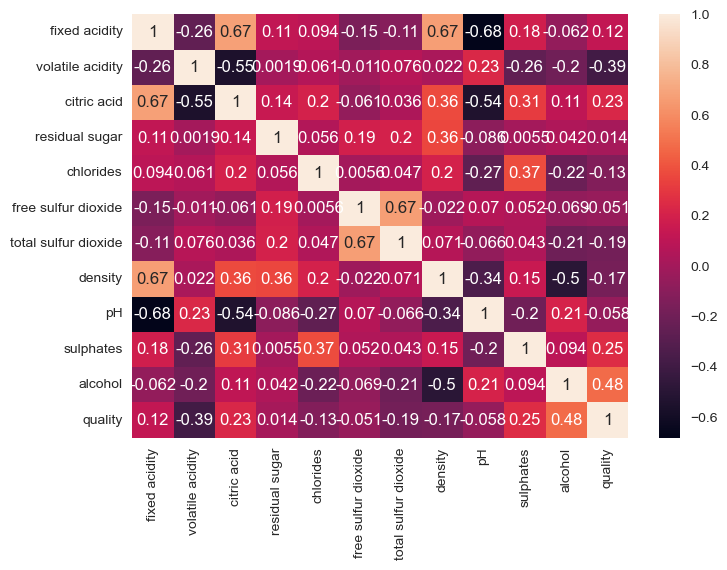

In [13]:
corr_matrix = redwine.corr()
sns.heatmap(corr_matrix, annot = True)

From the scatter plots and the heatmap it could be observed that such variables as 'fixed acidity' and 'pH', 'citric acid' and 'pH' are highly negatively correlated (coefficients -0.68 and -0.55). Such variables as 'density' and 'fixed acidity', 'fixed acidity' and 'citric acid' are highly positively correlated (coefficients 0.67). A single variable which is highly positively correlated with 'quality' is 'alcohol' (coefficient 0.48).

## Performing statistical inference

In this part commands to calculate confidence intervals of variables, t-tests measuring statistical significance of mean differences between groups of good and bad quality, confidence intervals for mean differences between groups of good and bad quality are presented. Commands are based on user inputs of the confidence level (e.g. 0.9, 0.95, 0.99).

#### Confidence intervals for various variables:

In [14]:
for inp1 in redwine.columns.values:
    mean_confidence_interval(redwine, inp1, 0.95)


Mean: 8.32; Confidence interval: 8.234, 8.405;
Confidence: 95.0 %; Standard error: 0.044; t-value: 1.961
Mean: 0.528; Confidence interval: 0.519, 0.537;
Confidence: 95.0 %; Standard error: 0.004; t-value: 1.961
Mean: 0.271; Confidence interval: 0.261, 0.281;
Confidence: 95.0 %; Standard error: 0.005; t-value: 1.961
Mean: 2.539; Confidence interval: 2.47, 2.608;
Confidence: 95.0 %; Standard error: 0.035; t-value: 1.961
Mean: 0.087; Confidence interval: 0.085, 0.09;
Confidence: 95.0 %; Standard error: 0.001; t-value: 1.961
Mean: 15.875; Confidence interval: 15.362, 16.388;
Confidence: 95.0 %; Standard error: 0.262; t-value: 1.961
Mean: 46.468; Confidence interval: 44.854, 48.081;
Confidence: 95.0 %; Standard error: 0.823; t-value: 1.961
Mean: 0.997; Confidence interval: 0.997, 0.997;
Confidence: 95.0 %; Standard error: 0.0; t-value: 1.961
Mean: 3.311; Confidence interval: 3.304, 3.319;
Confidence: 95.0 %; Standard error: 0.004; t-value: 1.961
Mean: 0.658; Confidence interval: 0.65, 0.666

#### Testing statistical significance of differences between groups (t-test):

In [15]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in redwine.iloc[:,:11].columns.values:
    summary, results = rp.ttest(group1= redwine[inp1][redwine['quality'] <= 5], group1_name= "bad quality",
         group2= redwine[inp1][redwine['quality'] > 5], group2_name= "good quality")
    print(summary)
    print(results)
    print("")
    if results.iloc[3,1] < (1 - inp2):
        print(f'There is the statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        significant.append(inp1)
    else:
        print(f'There is no statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')

What is the confidence level?:0.95
       Variable       N      Mean        SD        SE  95% Conf.  Interval
0   bad quality   744.0  8.142204  1.572396  0.057647   8.029034  8.255374
1  good quality   855.0  8.474035  1.862795  0.063706   8.348996  8.599074
2      combined  1599.0  8.319637  1.741096  0.043541   8.234234  8.405041
                           Independent t-test    results
0  Difference (bad quality - good quality) =     -0.3318
1                       Degrees of freedom =   1597.0000
2                                        t =     -3.8175
3                    Two side test p value =      0.0001
4                   Difference < 0 p value =      0.0001
5                   Difference > 0 p value =      0.9999
6                                Cohen's d =     -0.1914
7                                Hedge's g =     -0.1913
8                           Glass's delta1 =     -0.2110
9                         Point-Biserial r =     -0.0951

There is the statistically significan

#### Confidence intervals for mean differences between groups:

In [16]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in redwine.iloc[:,:11].columns.values:
    summary, results = rp.ttest(group1= redwine[inp1][redwine['quality'] <= 5], group1_name= "bad quality",
             group2= redwine[inp1][redwine['quality'] > 5], group2_name= "good quality")
    lower = ((summary.iloc[0,2] - summary.iloc[1,2])
    - stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    upper = ((summary.iloc[0,2] - summary.iloc[1,2])
    + stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    print(f'There is a {inp2*100} chance that the confidence interval of {lower.round(3), upper.round(3)} \
contains the true difference \nbetween means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
    print('')
    if (lower < 0 and upper < 0) or (lower > 0 and upper > 0):
        print(f'Since this interval does not contain the value “0” it means \n\
that it’s highly likely that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        significant.append(inp1)
    else:
        print(f'Since this interval contains the value “0” it means that it’s unlikely \n\
that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')


What is the confidence level?:0.95
There is a 95.0 chance that the confidence interval of (-0.338, -0.326) contains the true difference 
between means of fixed acidity in groups of good quality and bad quality.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of fixed acidity in groups of good quality and bad quality.

There is a 95.0 chance that the confidence interval of (0.115, 0.116) contains the true difference 
between means of volatile acidity in groups of good quality and bad quality.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of volatile acidity in groups of good quality and bad quality.

There is a 95.0 chance that the confidence interval of (-0.063, -0.061) contains the true difference 
between means of citric acid in groups of good quality and bad quality.

Since this interval does not contain the value

t-test results indicate that under 95 percent confidence level there are statistically signifficant differences in groups of good and bad quality of red wine between means of all variables, except residual sugar and pH. 

However, calculation of confidence intervals of differences between means in the groups of good and bad quality present slightly different results. Since the intervals for all variables do not contain the value “0” it means that it’s highly likely that there is a true difference between means of all variables in groups of good quality and bad quality.

## Applying machine learning models for data analysis

Ths part of analysis describes the process of building, training and evaluating machine learning models for finding attributes which affect quality of red wine (classification models) and attributes which could be used to predict the amount of alcohol in red wine (multiple regression models).

### Preparing the data for machine learning

In order to prepare the data for machine learning, independent variables and target variables are separated and transformed into numpy arrays.

#### Predicting quality - logistic, multinomial logistic and ordinal regression:

In order to predict quality of red wine, 'quality' column is chosen as a target variable.

In [11]:
x = redwine.iloc[:,:-1].to_numpy()
y = redwine.iloc[:, -1].to_numpy()
x, y = numpy.array(x), numpy.array(y)

##### Standardizing the data:

As it was observed that independent variables (features) are in different scales, they are standardized into a scale from 0 to 1.

In [12]:
x_norm = (x-numpy.min(x))/(numpy.max(x)-numpy.min(x))

##### Transforming the dependent variable into a binary variable:

In order to apply logistic regression model for classification, target variable is transformed into the binary variable with value 0 for quality ratings from 1 to 5 and value 1 for quality ratings from 6 to 10.

In [13]:
y_b = (y > 5).astype(int)

##### Splitting the data into train and test samples:

Arrays are randomly splitted into training (70 percent) and testing (30 percent) samples. As it is planned that both multinomial logistic regression models (with multivalued targed variable) and logistic regression models (with binary target variable) will be used, different splits are performed.

In [14]:
# For multinomial logistic regression:

x_o_train, x_o_test = train_test_split(x_norm, test_size=0.3, random_state=30)
y_o_train, y_o_test = train_test_split(y, test_size=0.3, random_state=30)

# For logistic regression:

x_b_train, x_b_test = train_test_split(x_norm, test_size=0.3, random_state=30)
y_b_train, y_b_test = train_test_split(y_b, test_size=0.3, random_state=30)

##### Visualising the data on a scatter plot:

The scatter plots bellow show that standardization of feature variables and grouping of target variable were performed successfuly. 

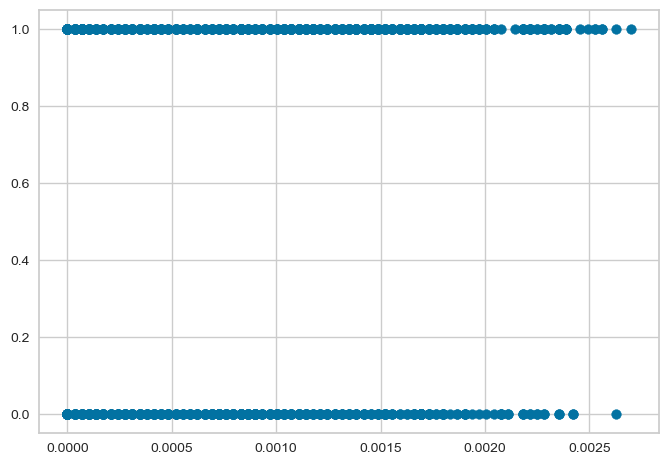

In [21]:
plt.scatter(x_b_train[:,2], y_b_train)
plt.show()

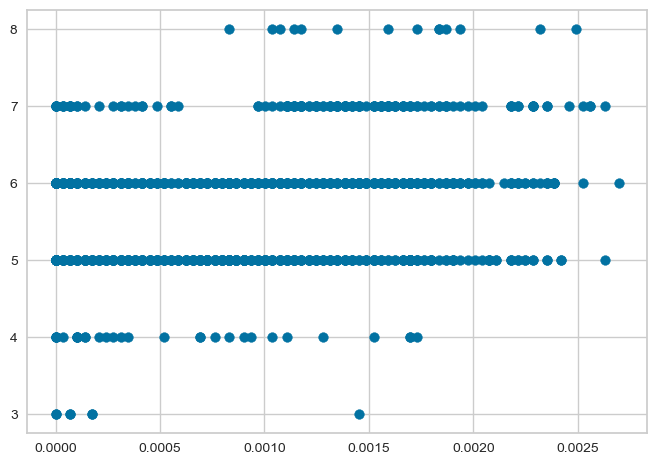

In [22]:
plt.scatter(x_o_train[:,2], y_o_train)
plt.show()

#### Predicting alcohol - multiple linear and polynomial regression:

Similar transformations are performed for alcohol as the target variable for the purpose to build and test multiple linear regression models.

##### Standardizing the data:

Data are separated into feature and target variables, transformed to numpy arrays and standardized into scale 0 to 1. This time target variable (alcohol) is also standardized.

In [23]:
x_lr = redwine.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]].to_numpy()
y_lr = redwine.iloc[:, 10].to_numpy()
x_lr, y_lr = numpy.array(x_lr), numpy.array(y_lr)

In [24]:
x_lr_norm = (x_lr-numpy.min(x_lr))/(numpy.max(x_lr)-numpy.min(x_lr))
y_lr_norm = (y_lr-numpy.min(y_lr))/(numpy.max(y_lr)-numpy.min(y_lr))



1.scalling: sklearn
    standardscaller
    
2.feature importance attributes in different classification models

3.check multicoliniearity for linear models, remove correlated variable

4. dot line in 'precision-recall curve' - average, not baseline



##### Splitting the data into train and test samples:

Arrays are randomly splitted into training (70 percent) and testing (30 percent) samples. 

In [25]:
x_lr_train, x_lr_test = train_test_split(x_lr_norm, test_size=0.3, random_state=30)
y_lr_train, y_lr_test = train_test_split(y_lr_norm, test_size=0.3, random_state=30)


### Building and fitting models

Machine learning models are built and trained by using sklearn and statsmodels libraries. Characteristics of different models (R^2 coeficient and beta coefficient values for intercepts and various features) are presented bellow.

#### Multiple linear regression:

##### Sklean solution:

In [26]:
model_lr = LinearRegression().fit(x_lr_train, y_lr_train)
r_sq = model_lr.score(x_lr_train, y_lr_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_lr.intercept_}")
print(f"slope: {model_lr.coef_}")


coefficient of determination: 0.6884704738627905
intercept: 87.82760038474795
slope: [ 2.27034278e+01  2.42752247e+01  3.26584928e+01  1.18039053e+01
 -3.72989985e+01 -5.12652563e-02 -1.11011570e-01 -2.62220145e+04
  1.60351560e+02  4.18173397e+01  9.64127329e+00]


##### Statsmodels solution:

In [27]:
x_lr_const=sm.add_constant(x_lr_train)       
model_lr2= sm.OLS(y_lr_train,x_lr_const).fit()        
print(model_lr2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     222.4
Date:                Fri, 05 May 2023   Prob (F-statistic):          3.62e-271
Time:                        08:47:23   Log-Likelihood:                 1108.9
No. Observations:                1119   AIC:                            -2194.
Df Residuals:                    1107   BIC:                            -2134.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8276      2.502     35.104      0.0

It can be observed that the multiple regression model quite well explains factors affecting alcohol concentration (R^2 is 0.68 which is quite high). Almost all attributes are statistically significant (p < 0.001), except free sulfur dioxide (x6), chlorides (x5) total sulfur dioxide (x7). fixed acidity fixed acidity, volatile acidity, citric acid, pH, and sulphates have the highest positive effect on alcohol concentration while density has the highest negative effect on the amount of alcohol in red wine.


#### Logistic regression:

In order to find out which attributes and how affect good and bad quality of red wine logistic regression model was build and fitted.


##### statsmodels solution:

In [28]:
x_b_const=sm.add_constant(x_b_train) 
logit_model=sm.Logit(y_b_train,x_b_const)
res_log=logit_model.fit()
print(res_log.summary2())


         Current function value: 0.523127
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.242     
Dependent Variable: y                AIC:              1194.7591 
Date:               2023-05-05 08:47 BIC:              1255.0014 
No. Observations:   1119             Log-Likelihood:   -585.38   
Df Model:           11               LL-Null:          -772.09   
Df Residuals:       1107             LLR p-value:      2.6620e-73
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
-----------------------------------------------------------------
        Coef.     Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------
const   -38.2571    97.8113 -0.3911 0.6957   -229.9637   153.4496
x1       17.6016    34.4207  0.5114 0.6091    -49.8618    85.0650
x2     -959.7525   167.3315 -5.7356 

##### sklearn solution:

In [29]:
log_b = LogisticRegression(solver='lbfgs')
model_b = log_b.fit(x_b_train, y_b_train)
r_sq = model_b.score(x_b_train, y_b_train)
print(f"Coefficient of determination: {r_sq}")
print(f"Intercept: {model_b.intercept_}")
print(f"Slope: {model_b.coef_}")


Coefficient of determination: 0.6184092940125112
Intercept: [0.58340765]
Slope: [[ 2.48280575e-01 -1.05378000e-01  6.29980648e-02  1.08501351e-01
  -8.20071215e-03  9.08076569e-01 -3.26489314e+00 -5.02068874e-04
  -5.39145719e-03  7.36663530e-02  7.93594537e-01]]


It can be observed that R^2 coeficients, intercept and slope coefficients are different depending on which library the model is built and fitted - sklearn or statsmodels libraries. 

Effects of such variables as sulphates, alcohol, citric acid, and total sulfur dioxide are statistical significant (p < 0.001). citric acid and total sulfur dioxide have negative effect while sulphates and alcohol have positive effect in clasifying quality as good or bad. 


#### Multinomial logistic regression:

In order to find out which attributes and how affect different quality ratings of red wine multinomial logistic regression model was build and fitted.

##### sklearn solution:

In [ ]:
model_ml = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_ml = model_ml.fit(x_o_train, y_o_train)
r_sq = model_ml.score(x_o_train, y_o_train)
print(f"Accuracy: {r_sq}")
print(f"Intercept: {model_ml.intercept_}")
print(f"Slope: {model_ml.coef_}")

#### statsmodels solution:

In [31]:
x_o_const=sm.add_constant(x_o_train) 
mn_model=sm.MNLogit(y_o_train,x_o_const)
model_mn=mn_model.fit_regularized()
print(model_mn.summary2())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9156836649570766
            Iterations: 912
            Function evaluations: 913
            Gradient evaluations: 912
                          Results: MNLogit
Model:               MNLogit           Pseudo R-squared:  0.219     
Dependent Variable:  y                 AIC:               2169.3000 
Date:                2023-05-05 08:47  BIC:               2470.5115 
No. Observations:    1119              Log-Likelihood:    -1024.7   
Df Model:            55                LL-Null:           -1311.8   
Df Residuals:        1059              LLR p-value:       1.4923e-87
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      912.0000                                       
--------------------------------------------------------------------
y = 0   Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
------------------------------------------------------

It can be observed that R^2 coeficients, intercept and slope coefficients are different depending on which library the model is built and fitted - sklearn or statsmodels libraries. 

For quality rating 5 and 6 (y = 2 and y = 3) the statistical significant predictor is volatile acidity (p< 0.01). It has highly negative effect on these rating scores. Other variables do not have statistically signifficant effects in the multinomial regression model.


### Making predictions from models

Prediction are made by applying the trained models on test data, then differences between predicted and test target data are calculated and plotted (see bellow predictions and their plots for multiple linear regression, logistic regression, and multinomial regression models).

#### Linear regression model:

In [32]:
predicted_lr = model_lr.predict(x_lr_test)


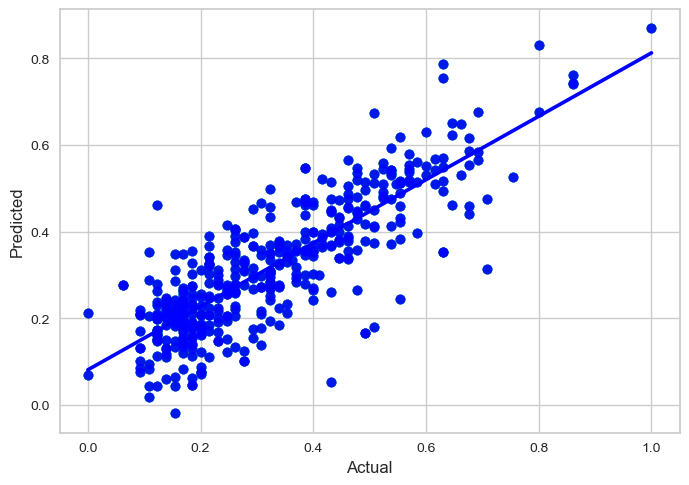

In [33]:
plt.scatter(y_lr_test,predicted_lr);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_lr_test,y=predicted_lr,ci=None,color ='blue');

(array([  1.,   5.,  27., 101., 161., 116.,  52.,   9.,   3.,   5.]),
 array([-0.33975666, -0.26646655, -0.19317644, -0.11988633, -0.04659622,
         0.02669389,  0.09998401,  0.17327412,  0.24656423,  0.31985434,
         0.39314445]),
 <BarContainer object of 10 artists>)

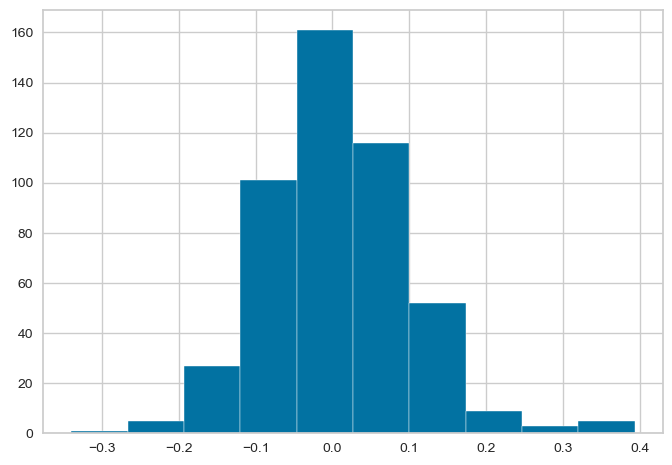

In [34]:
plt.hist(y_lr_test - predicted_lr)

Also, residuals of the model are plotted with the help of residualsplot function from yellowbricks library

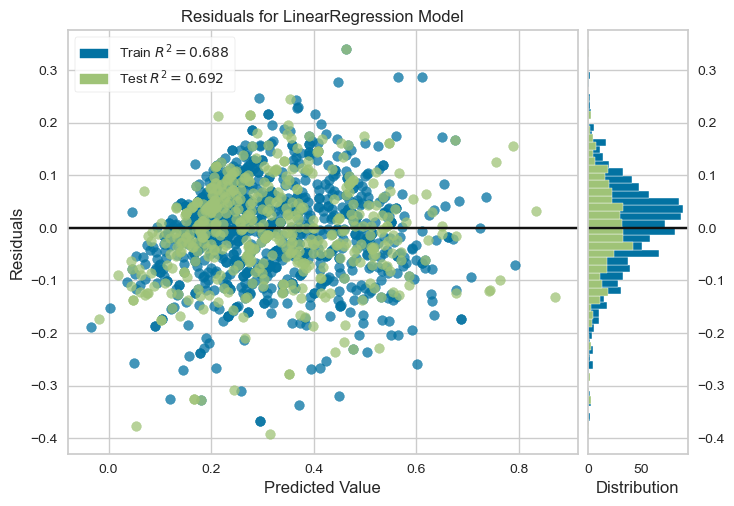

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
visualizer = ResidualsPlot(model_lr)
visualizer.fit(x_lr_train, y_lr_train)
visualizer.score(x_lr_test, y_lr_test)
visualizer.show()

#### Logistic regression model:

In [36]:
predicted_b = model_b.predict(x_b_test)


(array([131.,   0.,   0.,   0.,   0., 306.,   0.,   0.,   0.,  43.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

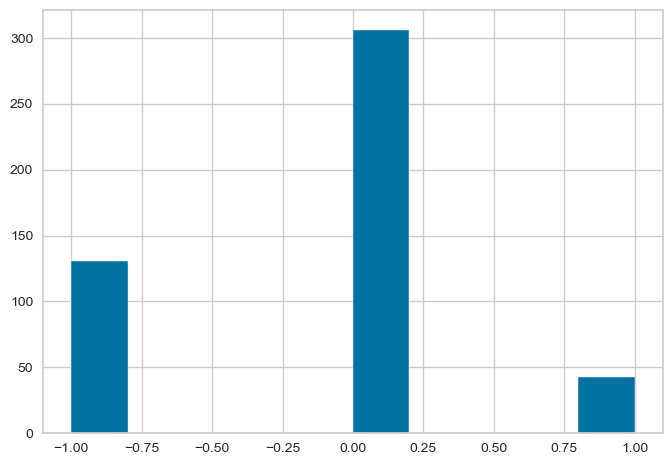

In [37]:
plt.hist(y_b_test - predicted_b)

#### Multinomial regression model:

In [38]:
predicted_ml = model_ml.predict(x_o_test)


(array([  2.,  17.,   0.,  85.,   0., 233., 123.,   0.,  18.,   2.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

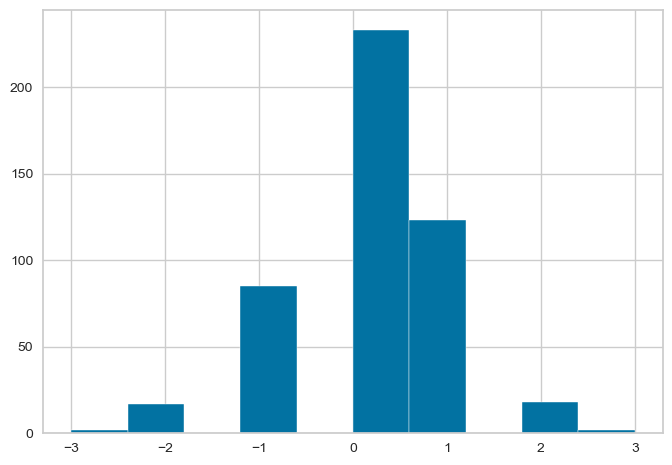

In [39]:
plt.hist(y_o_test - predicted_ml)

### Testing model performance

#### Cross-validation:

One of procedures to test model performance is the k-fold cross-validation, where the data is divided into k partitions of equal size. Under cross-validation procedure numbers of different test and train data are selected, and model scores calculated. One subset is tested each time and the remaining data are used for  fitting the model. The process is repeated sequentially until all subsets have been tested. Under this scheme, all data are used for training and testing. (See https://medium.com/swlh/cross-validation-on-regression-models-e98187c710c).

##### Linear regression model:

Cross-validation of linear regression model indicates that an average cv score is a bit lower than the score of coefficient of determination which was calculated in the initial train-test split.

In [40]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_lr, x_lr_norm, y_lr_norm, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.37045141 0.45273491 0.71204963 0.77524858 0.62850064]
Average CV Score:  0.5877970343189529
Number of CV Scores used in Average:  5


##### Logistic regression model:

In [41]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_b, x_norm, y_b, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.559375   0.671875   0.565625   0.653125   0.57053292]
Average CV Score:  0.6041065830721004
Number of CV Scores used in Average:  5


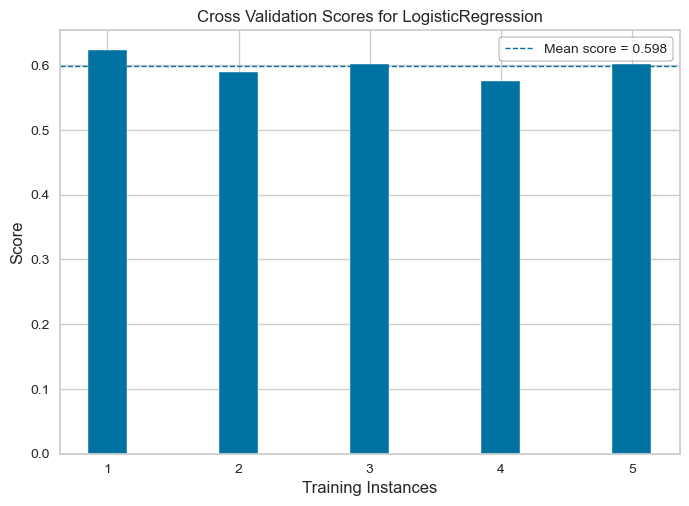

<Axes: title={'center': 'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [42]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(model_b, cv=cv, scoring='f1_weighted')

visualizer.fit(x_norm, y_b)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

Cross-validation of logistic regression model indicates that an average cv score is a bit lower than the score of coefficient of determination which was calculated in the initial train-test split.

##### Multinomial logistic regression model:

In [43]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_ml, x_norm, y_b, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.5875     0.659375   0.59375    0.65625    0.57680251]
Average CV Score:  0.6147355015673981
Number of CV Scores used in Average:  5


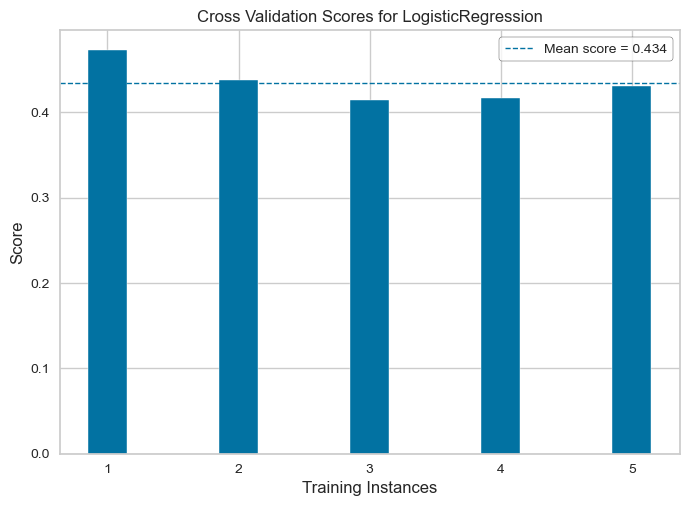

<Axes: title={'center': 'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [44]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(model_ml, cv=cv, scoring='f1_weighted')

visualizer.fit(x_norm, y)        # Fit the data to the visualizer
visualizer.show() 

Cross-validation of multinomial logistic regression model indicates that an average cv score is a bit lower than the score of coefficient of determination which was calculated in the initial train-test split.

#### MAE, MSE, RMSE:

##### Linear regression model:

For testing linear regression models the major indicators are Mean Absolute Error (MAE), Mean Square Error (MSE) and Root Mean Sqare Error (RMSE). A regression model tries to fit the data by drawing a line that minimizes the distance from the real data points and the point on the same line. The closer the values are to the line, the better the model behaved for that particular point. Therefore, the lower the MSE, the better. (See https://towardsdatascience.com/assessing-model-performance-for-regression-7568db6b2da0)


In [45]:
print(f'MAE: {metrics.mean_absolute_error(y_lr_test, predicted_lr)}')
print(f'MSE: {metrics.mean_squared_error(y_lr_test, predicted_lr)}')
print(f'RMSE: {numpy.sqrt(metrics.mean_squared_error(y_lr_test, predicted_lr))}')

MAE: 0.07143150554665573
MSE: 0.008941378739981755
RMSE: 0.09455886388901759


It can be observed that all three indicators have very low values, thus, the model which predicts alcohol concentration in red wine has high predictive power.

#### Accuracy, recall and precission:

##### Logistic regression model:

The major indicators measuring performance of classification models are presented in the classification report. The report presents precision, recall and f1 values for different values of the target variable. Any prediction relative to labeled data can be a true positive, false positive, true negative, or false negative.

Precision (also known as positive predictive value) can be represented as (TP/(TP+FP)).Precision can be thought of as the fraction of positive predictions that actually belong to the positive class.

Recall (also known as sensitivity) can be represented as (TP/TP + FN)).  Recall can be thought of as the fraction of positive predictions out of all positive instances in the data set. (See https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248).

F1 score is weighted harmonic mean of precision and recall. It is calculated by this formula: 2 * (Precision * Recall) / (Precision + Recall). The closer to 1, the better the model. (See https://www.statology.org/sklearn-classification-report/)


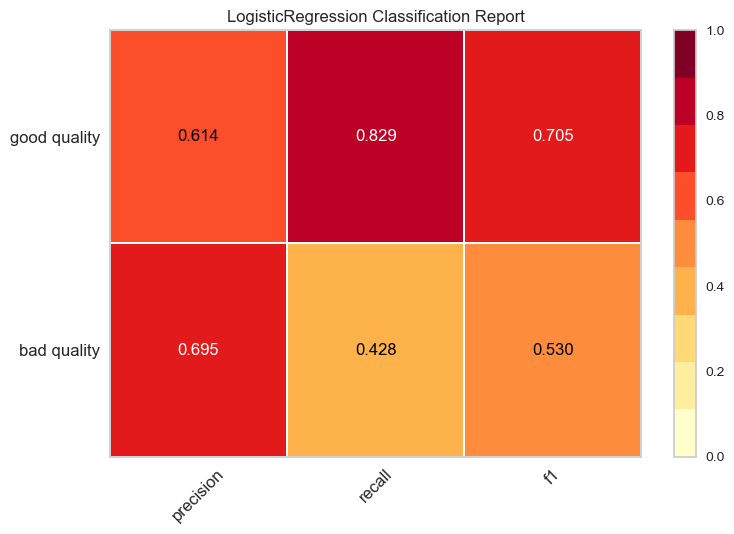

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [46]:
visualizer = ClassificationReport(model_b, classes=['bad quality', 'good quality'])

visualizer.fit(x_b_train, y_b_train)
visualizer.score(x_b_test, y_b_test)
visualizer.show()

It can be observed thast the model better predicts good quality of red wine rather than bad quality.

Another indicator which can be used for testing model performance is precission-recall curve. The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced. 

The precision-recall curve is constructed by calculating and plotting the precision against the recall for a single classifier at a variety of thresholds. For example, if we use logistic regression, the threshold would be the predicted probability of an observation belonging to the positive class. (See https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248).

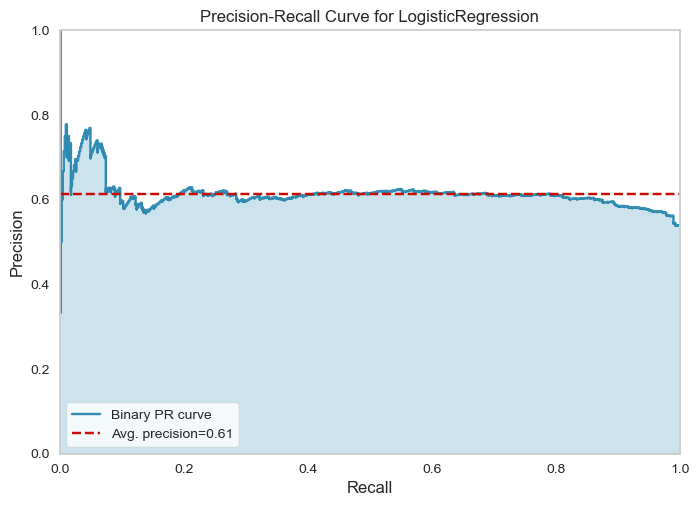

In [47]:
visualizer = precision_recall_curve(model_b, x_b_train, y_b_train)

It can be seen that the precission-recall curve does not much differ from 'baseline' (horizontal line in the middle), which indicates that the classificator is not very good ('baseline' classifier would simply predict that all instances belong to the positive class).

##### Multinomial logistic regression model:

Classification report was generated for multinomial logistic regression model. However, precision, recall and f1 score values were generated only for rating value 8.

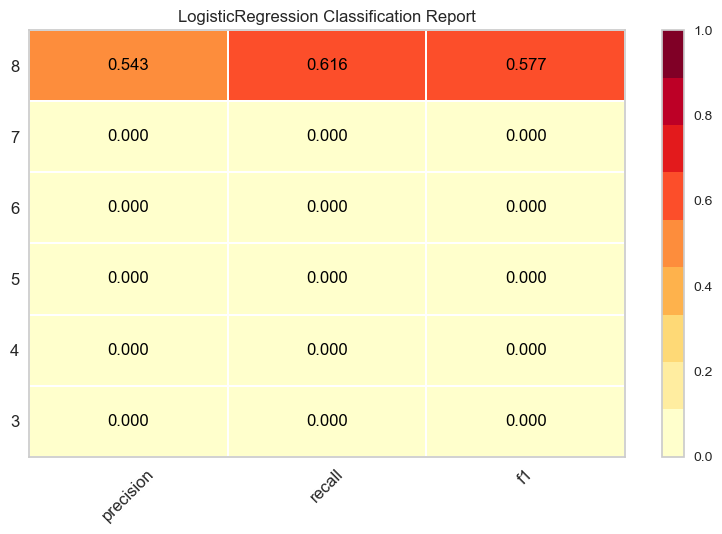

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [48]:
visualizer = ClassificationReport(model_ml)

visualizer.fit(x_o_train, y_o_train)
visualizer.score(x_o_test, y_o_test)
visualizer.show()

#### ROC curve:

##### Logistic regression model:

The receiver operating characteristic (ROC) curve is frequently used for evaluating the performance of binary classification algorithms. It provides a graphical representation of a classifier’s performance, rather than a single value like most other metrics.

The ROC curve is produced by calculating and plotting the true positive rate (TP/(TP + FN)) against the false positive rate (FP/(FP + TN))for a single classifier at a variety of thresholds.

AUC stands for area under the (ROC) curve. Generally, the higher the AUC score, the better a classifier performs for the given task. (See https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb)

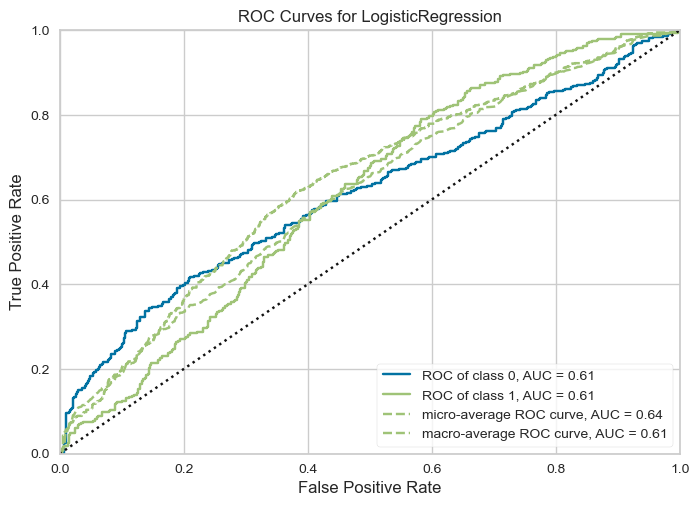

In [49]:
visualizer = roc_auc(model_b, x_b_train, y_b_train)

It can be observed from the plot that logistic regression model has some predictive power, however, it is not very high (AUC = 0.61 which is not nuch higher form 0.5 value which mean random guessing).

#### Confusion matrix:

The confusion matrix is often used for classication analysis, where a C x C matrix (C is the number of classes) is created by matching the predicted values (in columns) with the desired classes (in rows).

##### Logistic regression model:

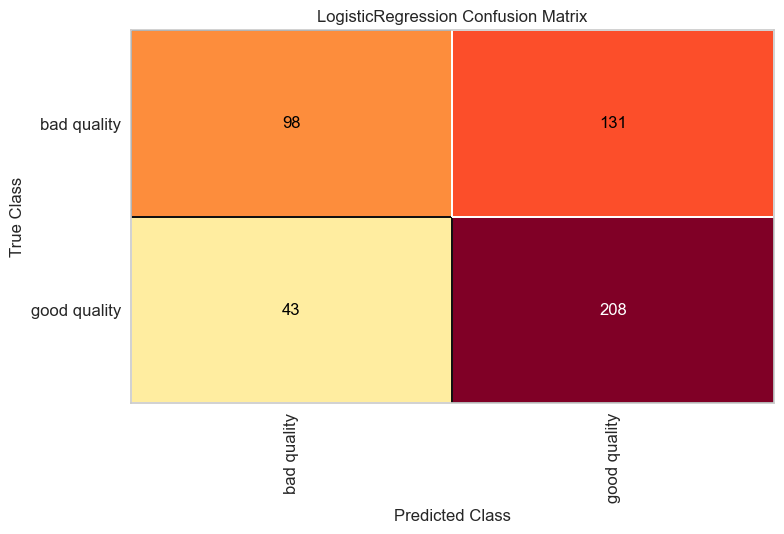

<Figure size 800x550 with 0 Axes>

In [50]:
confusion_matrix(
    LogisticRegression(),
    x_b_train, y_b_train, x_b_test, y_b_test,
    classes=['bad quality', 'good quality']
)
plt.tight_layout()

Confusion matrix confirms the observation from classification report that the model predicts good quality better than bad quality. 

##### Multinomial logistic regression model:

Confussion matrix for multinomial logistic regression model indicates that the model generates just two predicted values - 5 and 6. Obviously, it also predicts these values the best.

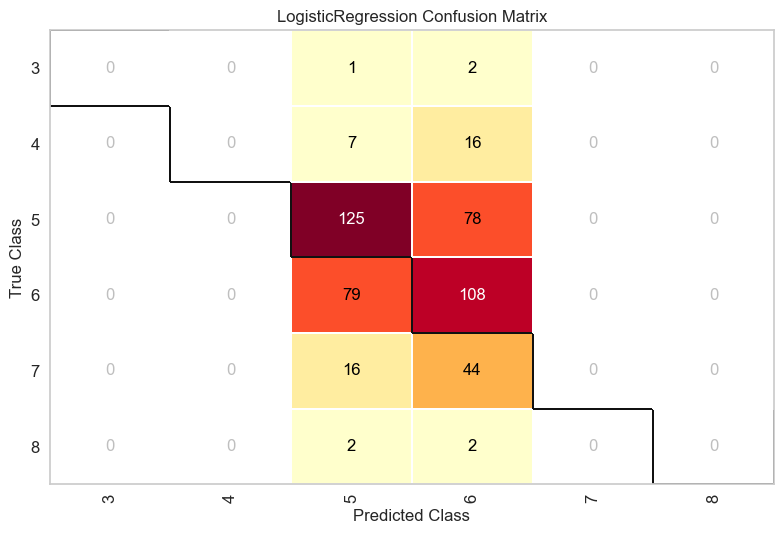

<Figure size 800x550 with 0 Axes>

In [51]:
confusion_matrix(
    model_ml,
    x_o_train, y_o_train, x_o_test, y_o_test)
plt.tight_layout()

### Feature engeneering

Feature engennering is the process of taking certain variables (features) from the dataset and transforming them in a predictive model. Single variables and combinations of variables are manipulated in order to engineer new features. By creating new features, the likelihood that one of the new variables has more predictive power over our outcome variable than the original, un-transformed variables is increased. (See https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755)

#### Logistic regression model:

In order to randomly select feature combinations and train models based on the these combinations, a function 'find_inputs' is created. As it is a new function it is presented here and not in the file 'utils.py'. Random selection of variables is run 10000 times in order to select various possible combinations of variables, model scores are calculated and combinations and model scores are saved in a dictionary (if unique). Then the combination which generates the maximum score of R^2 coefficient is selected.

First, the function is applied to the logistic regression model then to other models.

In [52]:
def find_inputs(model, x_data, y_data): 
    data = {}
    var_list = [0,1,2,3,4,5,6,7,8,9,10,11]
    i_list = [[]]
    u = 0
    while u < 10000:
        i = random.choices(var_list[:-1], k=random.choice(var_list[1:]))
        i = list(numpy.unique(i))
        x = x_data[:,i]
        mod = model.fit(x, y_data)
        r_sq = mod.score(x, y_data)
        if i not in i_list:
            data[f"{i}"] = r_sq
            i_list.append(i)
        u+=1
    print('Combinations of independent variables for the model with the highest coeficient of determination:')
    print(f'{max(data, key=data.get)}')
    print('Coeficient of determination:') 
    print(data[f'{max(data, key=data.get)}'])
    return data

In [15]:
x_b_train

array([[0.02422145, 0.00200692, 0.00041522, ..., 0.01190311, 0.0016609 ,
        0.03633218],
       [0.02214533, 0.00299308, 0.00010381, ..., 0.01249135, 0.0016955 ,
        0.04394464],
       [0.03183391, 0.00183391, 0.00083045, ..., 0.01110727, 0.00197232,
        0.03287197],
       ...,
       [0.02698962, 0.00179931, 0.00086505, ..., 0.01186851, 0.00224913,
        0.03114187],
       [0.03425606, 0.00093426, 0.0016955 , ..., 0.01103806, 0.00179931,
        0.0432526 ],
       [0.02283737, 0.00290657, 0.00010381, ..., 0.01217993, 0.00193772,
        0.04256055]])

In [53]:
data = find_inputs(LogisticRegression(), x_b_train, y_b_train)

Combinations of independent variables for the model with the highest coeficient of determination:
[0, 2, 3, 4, 5, 6, 9, 10]
Coeficient of determination:
0.6184092940125112


Top ten combinations (generating highest scores of coefficient of determination) are presented bellow.

In [54]:
res = dict(sorted(data.items(), key = lambda x: x[1], reverse = True)[:10])
 
print(f"Top 10 combinations of independent variables and coeficients of determination: \n{res}")

Top 10 combinations of independent variables and coeficients of determination: 
{'[0, 2, 3, 4, 5, 6, 9, 10]': 0.6184092940125112, '[0, 1, 3, 4, 5, 6, 10]': 0.6184092940125112, '[0, 1, 2, 5, 6, 8, 10]': 0.6184092940125112, '[0, 1, 2, 3, 5, 6, 7, 10]': 0.6184092940125112, '[0, 2, 3, 5, 6, 8, 10]': 0.6184092940125112, '[0, 1, 5, 6, 9, 10]': 0.6184092940125112, '[0, 2, 5, 6, 7, 9, 10]': 0.6184092940125112, '[0, 3, 5, 6, 8, 10]': 0.6184092940125112, '[0, 3, 4, 5, 6, 8, 9, 10]': 0.6184092940125112, '[0, 1, 2, 3, 5, 6, 8, 9, 10]': 0.6184092940125112}


It can be observed that the the function generated combination [0, 2, 3, 4, 5, 6, 7, 8, 10] which generated R^2 coefficient score identical to the one for the initial model (with all variables). It means that variables 1 (volatile acidity) and 9 (sulphates) could be removed from the model without significant loss of model's predictive power. However, there is no combination of independent variables which could improve predictive power of the logistic regression model.


#### Multinomial logistic regression model:

The same function was applied for multinomial regression model. 

In [55]:
data = find_inputs(model_ml, x_o_train, y_o_train)

Combinations of independent variables for the model with the highest coeficient of determination:
[0, 2, 4, 5, 6, 7, 8, 10]
Coeficient of determination:
0.47810545129579984


In [56]:
res = dict(sorted(data.items(), key = lambda x: x[1], reverse = True)[:10])
 
print(f"Top 10 combinations of independent variables and coeficients of determination: \n{res}")

Top 10 combinations of independent variables and coeficients of determination: 
{'[0, 2, 4, 5, 6, 7, 8, 10]': 0.47810545129579984, '[0, 1, 2, 3, 4, 5, 6, 8, 10]': 0.47810545129579984, '[0, 1, 2, 5, 6, 7, 9, 10]': 0.47810545129579984, '[0, 2, 4, 5, 6, 7, 8, 9, 10]': 0.47810545129579984, '[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]': 0.47810545129579984, '[0, 2, 3, 5, 6, 7, 8, 9, 10]': 0.47810545129579984, '[0, 1, 4, 5, 6, 7, 9, 10]': 0.47810545129579984, '[0, 1, 5, 6, 7, 9, 10]': 0.47810545129579984, '[0, 1, 5, 6, 9, 10]': 0.47810545129579984, '[0, 3, 5, 6, 7, 8, 9, 10]': 0.47810545129579984}


It can be observed that the the function generated combination [0, 3, 5, 6, 9, 10] which generated R^2 coefficient score identical to the one for the initial model (with all variables). It means that variables 1 (volatile acidity), 2 (citric acid), 4 (chlorides), 7 (density), and 8 (pH) could be removed from the model without significant loss of model's predictive power. However, there is no combination of independent variables which could improve predictive power of the multinomial logistic regression model.


#### Linear regression model:

The same function was applied for multiple linear regression model. 

In [57]:
data = find_inputs(model_lr, x_lr_train, y_lr_train)

Combinations of independent variables for the model with the highest coeficient of determination:
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10]
Coeficient of determination:
0.6884077901962251


In [58]:
res = dict(sorted(data.items(), key = lambda x: x[1], reverse = True)[:10])
 
print(f"Top 10 combinations of independent variables and coeficients of determination: \n{res}")

Top 10 combinations of independent variables and coeficients of determination: 
{'[0, 1, 2, 3, 4, 6, 7, 8, 9, 10]': 0.6884077901962251, '[0, 1, 2, 3, 5, 6, 7, 8, 9, 10]': 0.6875466536730244, '[0, 1, 2, 3, 6, 7, 8, 9, 10]': 0.6874718543369099, '[0, 1, 2, 3, 4, 5, 7, 8, 9, 10]': 0.6859217797944661, '[0, 2, 3, 4, 5, 6, 7, 8, 9, 10]': 0.6837388299943901, '[0, 2, 3, 5, 6, 7, 8, 9, 10]': 0.6834529117643907, '[0, 2, 3, 4, 6, 7, 8, 9, 10]': 0.6833531281855104, '[0, 2, 3, 6, 7, 8, 9, 10]': 0.6830736659359271, '[0, 1, 2, 3, 4, 7, 8, 9, 10]': 0.6827536097498355, '[0, 1, 2, 3, 7, 8, 9, 10]': 0.6822845053631776}


It can be observed that the the function generated combination [0, 1, 2, 3, 4, 6, 7, 8, 9, 10] which is the initial model with all variables. It means that there is no combination of independent variables which could improve predictive power of the multiple linear regression model and no variables which could be removed without the loss of predictive power of the model.


## Comparing classification models

Finally, logistic regression model for prediction of good and bad quality of red wine is compared with other classification models which are available in sklearn library (SVC, NuSVC, Linear SVC, SGD Classifier, K-Neighbour Classifier, Logistic Regression with solver 'lbfgs', Logistic Regression CV (cv = 3), Bagging Classifier, Extra Trees Classifiers, and Random Forest Classifier). For that purpose, a function for model fitting is created and looped over the list of various models. 

In [59]:
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """    
    # Instantiate the classification model and visualizer
    
    model.fit(x_train, y_train, **kwargs)
    r_sq = model.score(x_train, y_train)
    predicted = model.predict(x_test)
    # Compute and return F1 (harmonic mean of precision and recall)
    f1 = f1_score(y_test, predicted)
    print("{} F1_score: {}".format(estimator.__class__.__name__, f1))
    print(f"R^2 score: {r_sq}")
    print('')
    scores["model_name"].append(f'{model.__class__.__name__}')
    scores["r_score"].append(r_sq)
    scores["f1_score"].append(f1)
    
   
scores = {}
scores["model_name"] = []
scores["r_score"] = []
scores["f1_score"] = []
for model in models:
    score_model(x_b_train, y_b_train, x_b_test, y_b_test, model)
    

SVC F1_score: 0.7094017094017093
R^2 score: 0.5683646112600537

NuSVC F1_score: 0.5341130604288498
R^2 score: 0.47989276139410186

LinearSVC F1_score: 0.7164179104477612
R^2 score: 0.6246648793565683

SGDClassifier F1_score: 0.7111111111111111
R^2 score: 0.6175156389633601

KNeighborsClassifier F1_score: 0.6640316205533596
R^2 score: 0.7488829311885612

LogisticRegression F1_score: 0.7050847457627119
R^2 score: 0.6184092940125112

LogisticRegressionCV F1_score: 0.7734374999999999
R^2 score: 0.7292225201072386

BaggingClassifier F1_score: 0.807920792079208
R^2 score: 0.9848078641644326

ExtraTreesClassifier F1_score: 0.8371212121212122
R^2 score: 1.0

RandomForestClassifier F1_score: 0.8339622641509433
R^2 score: 1.0



Model scores are saved into file in order to be used for the Data Studio visualization.

In [60]:
scores = pd.DataFrame(scores).set_index("model_name")
scores.to_csv('scores.csv')

Classification reports from different models are plotted bellow. 

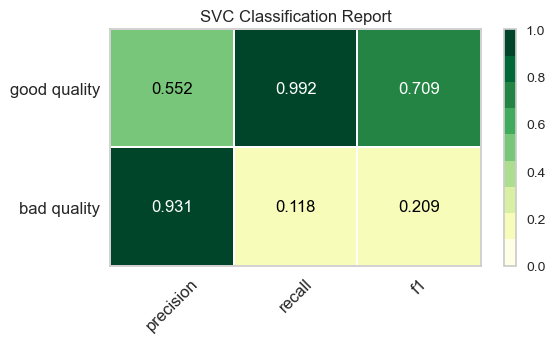

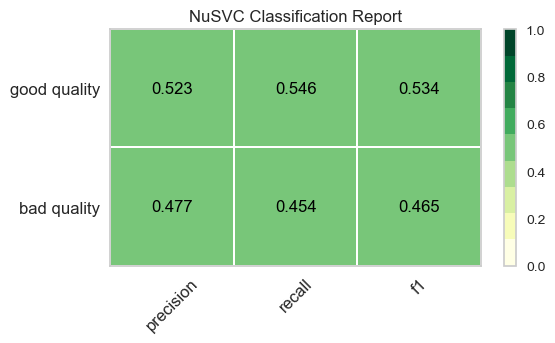

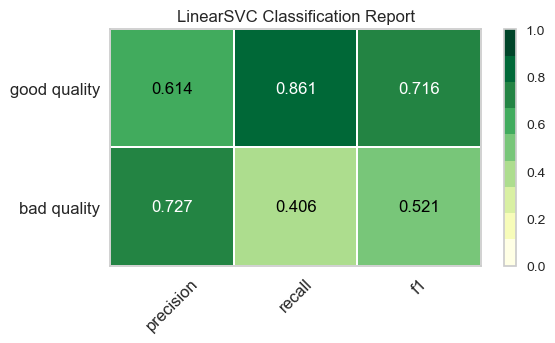

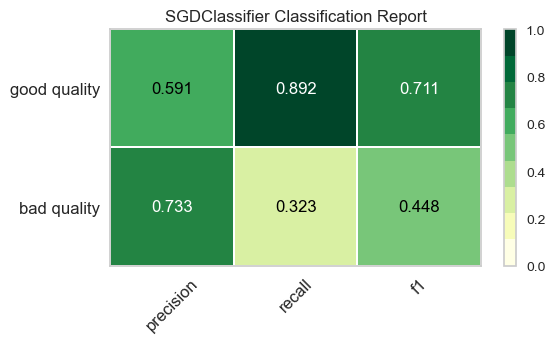

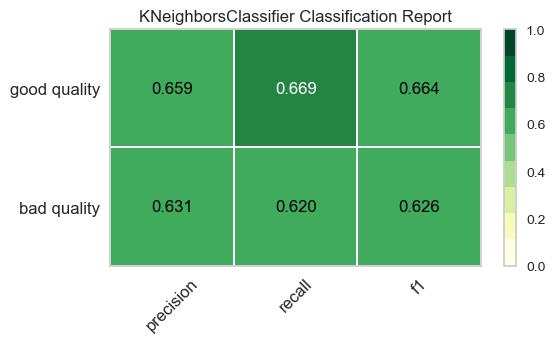

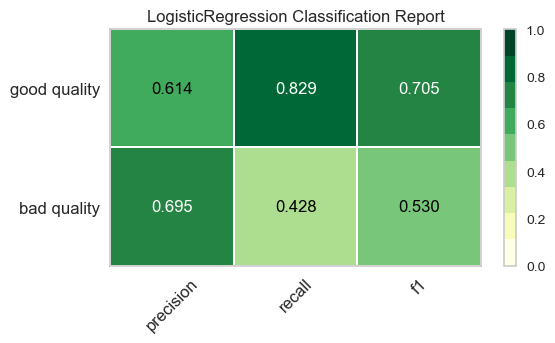

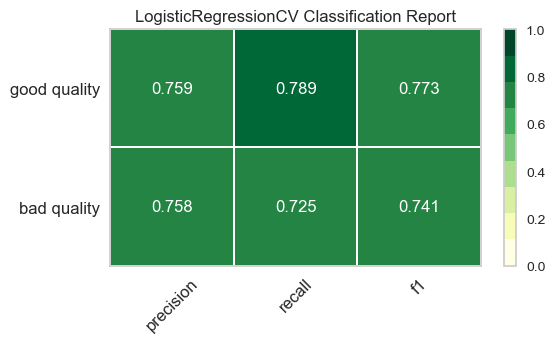

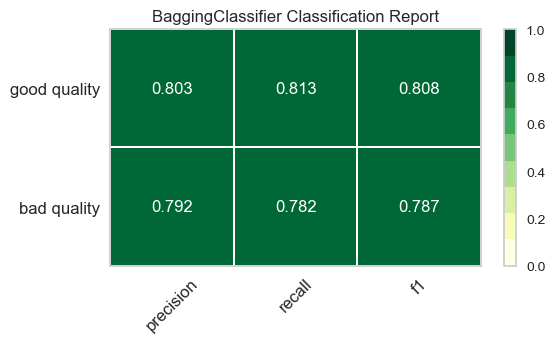

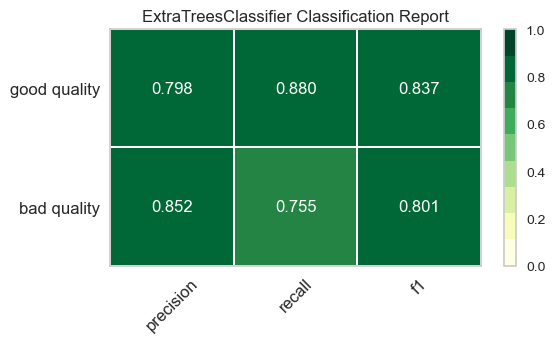

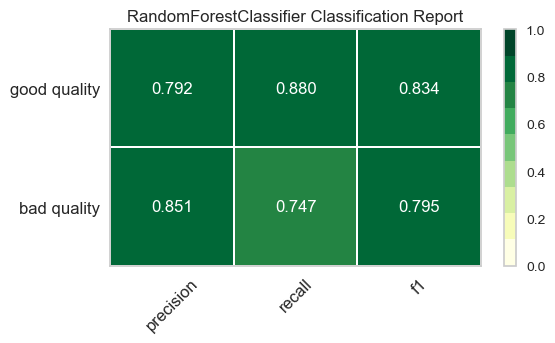

In [61]:
def visualize_model(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['bad quality', 'good quality'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()

for model in models:
    visualize_model(x_b_train, y_b_train, x_b_test, y_b_test, model)
    

It can be observered that most of those classification models perform better than the simple logistic regression model (their coefficients of determination are higher than R^2 score of the innitial logistic regression model), except K-Neighbours Classifier, SVC, and NuSVC. Random forest classifier is the best model with the highest precision and recall scores for both good and bad quality. 

## Conclusions

The following conclusions can be made from the results of data analysis of the Red Wine Quality dataset:
- Such variables as 'fixed acidity' and 'pH', 'citric acid' and 'pH' are highly negatively correlated (coefficients -0.68 and -0.55). Such variables as 'density' and 'fixed acidity', 'fixed acidity' and 'citric acid' are highly positively correlated (coefficients 0.67). A single variable which is highly positively correlated with 'quality' is 'alcohol' (coefficient 0.48).
- t-test results indicate that under 95 percent confidence level there are statistically signifficant differences in groups of good and bad quality of red wine between means of all variables, except residual sugar and pH.
- calculation of confidence intervals of differences between means in the groups of good and bad quality present slightly different results. Since the intervals for all variables do not contain the value “0” it means that it’s highly likely that there is a true difference between means of all variables in groups of good quality and bad quality.
- The multiple regression model quite well explains factors affecting alcohol concentration (R^2 is 0.68 which is quite high). Almost all attributes are statistically significant (p < 0.001), except free sulfur dioxide (x6), chlorides (x5) total sulfur dioxide (x7). fixed acidity fixed acidity, volatile acidity, citric acid, pH, and sulphates have the highest positive effect on alcohol concentration while density has the highest negative effect on the amount of alcohol in red wine.
- R^2 coeficients, intercept and slope coefficients are different depending on which library the model is built and fitted - sklearn or statsmodels libraries. 
- In logistic regression model effects of such variables as sulphates, alcohol, citric acid, and total sulfur dioxide are statistical significant (p < 0.001). citric acid and total sulfur dioxide have negative effect while sulphates and alcohol have positive effect in clasifying quality as good or bad. 
- For quality rating 5 and 6 (y = 2 and y = 3) the statistical significant predictor is volatile acidity (p< 0.01). It has highly negative effect on these rating scores. Other variables do not have statistically signifficant effects in the multinomial regression model.
- It could be infered from MAE, MSE an RMSE values that the linear regression model which predicts alcohol concentration in red wine has high predictive power.
- The logistic regression model better predicts good quality of red wine rather than bad quality.
- The logistic regression model has some predictive power, however, it is not very high (AUC = 0.61 which is not nuch higher form 0.5 value which mean random guessing).
- variables volatile acidity and sulphates could be removed from the model without significant loss of model's predictive power. However, there is no combination of independent variables which could improve predictive power of the logistic regression model.
- Variables volatile acidity, citric acid, chlorides, density, and pH could be removed from the model without significant loss of model's predictive power. However, there is no combination of independent variables which could improve predictive power of the multinomial logistic regression model.
- There is no combination of independent variables which could improve predictive power of the multiple linear regression model and no variables which could be removed without the loss of predictive power of the model.
- Most of those classification models perform better than the simple logistic regression model (their coefficients of determination are higher than R^2 score of the innitial logistic regression model), except K-Neighbours Classifier, SVC, and NuSVC. Random forest classifier is the best model with the highest precision and recall scores for both good and bad quality. 

#### Limitations and suggestions for improvement:

- It is not explained why statsmodels and sklearn libraries generate different coeficients for logistic regression model.
- Potential improvement could be to replicate research results which were presented in Cortez et. al (2009) - e.g.sensitivity analysis presented in that article could be performed, etc.



## Google Data Studio charts

https://lookerstudio.google.com/reporting/1f05a4d6-61d8-475a-8737-8b19b3dc8f36/page/T5zOD/edit

## References

1. Cortez P., A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
2. Red Wine Quality, Kaggle, https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
3. https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755; 
4. https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248; 
5. https://www.statology.org/sklearn-classification-report/; 
6. https://towardsdatascience.com/assessing-model-performance-for-regression-7568db6b2da0.
